In [7]:
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = glob(r"C:\Users\bluecom013\Downloads\그랜드코리아레저(주)_영업점별 고객 식음료 주문 내역_20230630.csv")
df = pd.read_csv(path[0])

df.head()

,지급일자,영업점코드,영업점명,식음메뉴그룹코드,식음메뉴그룹명,식음메뉴코드,식음메뉴명(한글),식음메뉴명(영문),성별,고객여권발급국가코드,고객여권발급국가명,주문수량
0,2019-03-25,HT,드래곤,1002,라이스류,1459,전복미역국,Seaweed Soup with Abalone(전복미역국),M,CHN,중국,47
1,2019-03-05,CX,코엑스,2011,음료,2116,아이스티,NaN,M,JPN,일본,3
2,2019-03-05,HT,드래곤,1004,VIP안주,1028,계절과일(VIP),Seasonal Fresh Fruits,M,JPN,일본,7
3,2019-02-24,HT,드래곤,9001,기타,9030,페리에워터,NaN,F,CHN,중국,1
4,2019-03-16,CX,코엑스,1002,라이스류,1316,주꾸미삼겹살볶음,Stir-fried Spicy Pork with Baby Octopus,M,CHN,중국,31


In [29]:
df_list=list(df.columns)
#df.info()

print(df_list)

['지급일자', '영업점코드', '영업점명', '식음메뉴그룹코드', '식음메뉴그룹명', '식음메뉴코드', '식음메뉴명(한글)', '식음메뉴명(영문)', '성별', '고객여권발급국가코드', '고객여권발급국가명', '주문수량']


In [9]:
#결측치 확인
df.isnull().sum()

지급일자               0
영업점코드              0
영업점명               0
식음메뉴그룹코드           0
식음메뉴그룹명            0
식음메뉴코드             0
식음메뉴명(한글)          0
식음메뉴명(영문)     941904
성별            189216
고객여권발급국가코드    189182
고객여권발급국가명     189324
주문수량               0
dtype: int64

c:\Users\bluecom013\miniconda3\envs\openai\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\bluecom013\miniconda3\envs\openai\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\bluecom013\miniconda3\envs\openai\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47700 (\N{HANGUL SYLLABLE ME}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\bluecom013\miniconda3\envs\openai\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45684 (\N{HANGUL SYLLABLE NYU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\bluecom013\miniconda3\envs\openai\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) mi

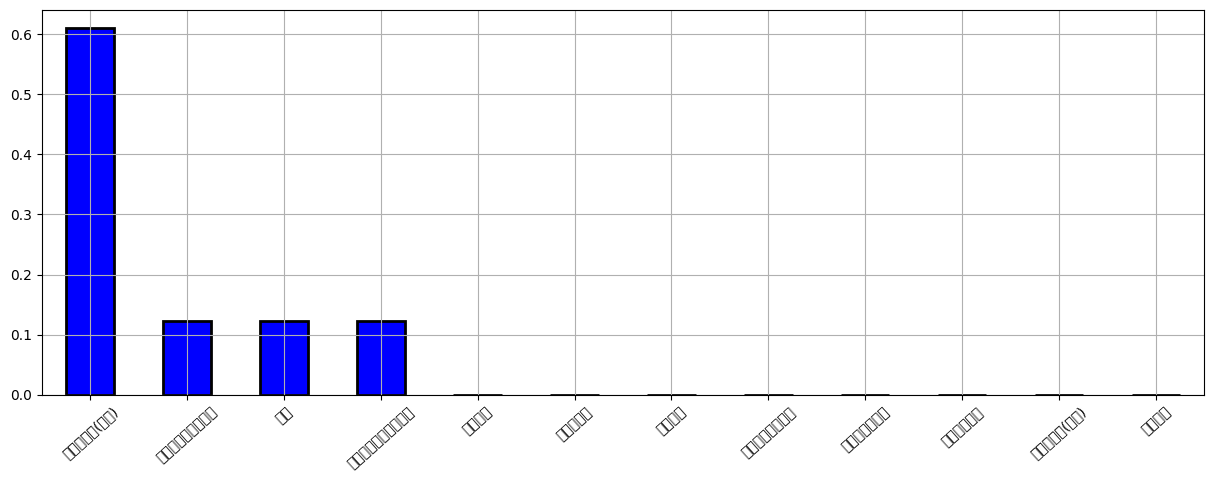

In [10]:
df.isna().mean().sort_values(ascending=False).plot( kind='bar', figsize=(15,5),  grid=True, color='blue', edgecolor='black', linewidth=2, rot=42)

plt.show()
#sns.heatmap(df.isnull(),cbar=True)


In [11]:
#최빈값 확인
df['성별'].value_counts()

성별
M    1017112
F     338680
Name: count, dtype: int64

In [12]:
#각 열 최빈값으로 채우기
'''
for column in df.columns:
    mode_value = df[column].mode()[0]  # 최빈값
    df[column].fillna(mode_value, inplace=True)
'''
df['성별'].fillna(df['성별'].mode()[0], inplace=True)
df.isnull().sum()
df['성별'].value_counts()

성별
M    1206328
F     338680
Name: count, dtype: int64

In [13]:
df.sort_values('주문수량', ascending=False).head(10)

,지급일자,영업점코드,영업점명,식음메뉴그룹코드,식음메뉴그룹명,식음메뉴코드,식음메뉴명(한글),식음메뉴명(영문),성별,고객여권발급국가코드,고객여권발급국가명,주문수량
1446287,2023-01-27,CX,코엑스,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,2911
1202737,2022-12-20,CX,코엑스,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,2910
1008673,2022-12-27,CX,코엑스,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,2910
647787,2023-01-03,CX,코엑스,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,2881
1447299,2023-01-17,CX,코엑스,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,2880
1105883,2022-11-16,CX,코엑스,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,2880
83794,2020-08-18,CX,코엑스,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,2593
1440888,2022-07-06,CX,코엑스,2011,음료,2057,펩시콜라,NaN,M,NaN,NaN,2560
1440729,2022-01-18,CX,코엑스,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,2441
644530,2021-12-22,CX,코엑스,2011,음료,2063,생수(BOTTLE),NaN,M,NaN,NaN,2436


In [14]:
print(df['영업점명'].value_counts())
print('-'*20)
print(df['식음메뉴명(한글)'].value_counts())
print('-'*20)
print(df['성별'].value_counts())
print('-'*20)
print(df['고객여권발급국가명'].value_counts())

영업점명
코엑스    610732
드래곤    532755
롯데     401521
Name: count, dtype: int64
--------------------
식음메뉴명(한글)
계절과일(VIP)                         33083
생맥주                               25995
펩시콜라                              16658
흑후추스테이크                           13740
미에로화이바                            13459
                                  ...  
문배술                                   1
베이컨토마토샌드위치                            1
잔치국수                                  1
GOLD EVENT 메비우스스카이블루6MG(4500원)        1
GOLD EVENT 히츠 퍼플라벨(4500원)             1
Name: count, Length: 1101, dtype: int64
--------------------
성별
M    1206328
F     338680
Name: count, dtype: int64
--------------------
고객여권발급국가명
중국            346182
일본            173569
미국            165226
대한민국(영주권자)    158386
대만            119346
               ...  
볼리비아               2
마케도니아 공화국          1
체코공화국              1
슬로바키아              1
슬로베이아              1
Name: count, Length: 106, dtype: int64


In [21]:
def 주문수량(*A):
    #global df
    if type(A)==str:
        print(df['주문수량'].groupby(df[A]).sum())
    elif type(A)==list:
        print(df['주문수량'].groupby(df[A]).sum())
    

In [23]:
주문수량('영업점명')

영업점명
드래곤    5489744
롯데     2020134
코엑스    5067045
Name: 주문수량, dtype: int64


In [24]:
주문수량('식음메뉴명(한글)')

식음메뉴명(한글)
(1인분)             8818
(BAR)               84
(NO ICE)          1406
(NO SUGAR)        3972
(더블)               623
                 ...  
히츠 엠버라벨(아이코스)     4094
히츠 퍼플라벨(아이코스)    13548
히츠그린                88
히츠실버                 4
힘내삼드링크세트(VIP)     6685
Name: 주문수량, Length: 1101, dtype: int64


In [31]:
주문수량(df_list[10])

고객여권발급국가명
그레나다            14
그리스             10
나이지리아           25
남아프리카 공화국       77
네덜란드          3626
             ...  
핀랜드             11
필리핀          27737
헝가리             27
호주           36888
홍콩            9765
Name: 주문수량, Length: 106, dtype: int64
